# Univariate Feature Selection

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
data=pd.read_csv('./train.csv')

x=data.iloc[:,0:20]
y=data.iloc[:,-1]

In [26]:
data.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [16]:
from sklearn.feature_selection import chi2,SelectKBest


In [17]:
#apply SelectKBest class to extract top 10 best features

BestFeatures = SelectKBest(score_func=chi2, k=10)
fit = BestFeatures.fit(x,y)

In [18]:

df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)



In [19]:
#concatenating two dataframes for better visualization

f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Specs','Score']

In [20]:
print(f_Scores.nlargest(10,'Score'))       # print 10 best features in descending order

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


In [22]:
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier 

model = ExtraTreesClassifier(n_estimators=10) 
model.fit(x,y)

ExtraTreesClassifier(n_estimators=10)

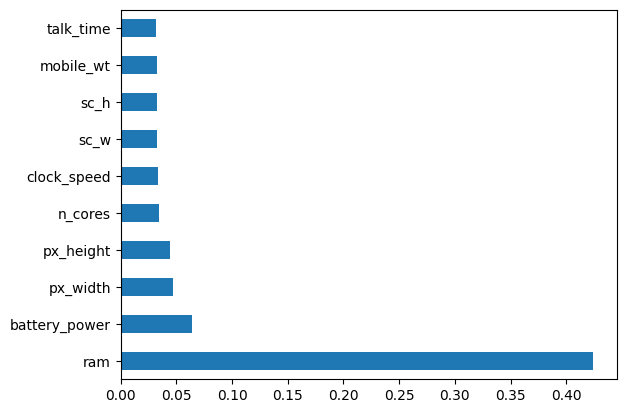

<Figure size 800x600 with 0 Axes>

In [24]:
# plot the graph of feature importances for better visualization 

feat_imp = pd.Series(model.feature_importances_, index=x.columns)
feat_imp.nlargest(10).plot(kind='barh')

plt.figure(figsize=(8,6))
plt.show()